In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,f1_score
from sklearn import tree

In [2]:
df_prices = pd.read_csv('Proc_Data/Prices.csv', encoding = 'ISO-8859-1')
df_prices.drop(columns = [ 'Unit','Element', 'Element Code', 'Flag'], inplace = True)
df_temp = pd.read_csv('Proc_Data/Temperature_change_by_country.csv', encoding = 'ISO-8859-1',header = 0, names = ['Area', 'Year', 'Temp Difference'])

In [3]:
df = pd.merge(df_prices, df_temp, on = ['Area', 'Year'])
df.rename(columns = {'Value':'Price(LCU/tonne)'}, inplace = True) 
df.head(95)

,Area Code,Area,Item Code,Item,Year,Price(LCU/tonne),Temp Difference
0,2,Afghanistan,221,"Almonds, with shell",1993,46000.0,0.666625
1,2,Afghanistan,515,Apples,1993,6100.0,0.666625
2,2,Afghanistan,526,Apricots,1993,29000.0,0.666625
3,2,Afghanistan,44,Barley,1993,6300.0,0.666625
4,2,Afghanistan,1062,"Eggs, hen, in shell",1993,18000.0,0.666625
...,...,...,...,...,...,...,...
90,2,Afghanistan,560,Grapes,1998,27000.0,1.046687
91,2,Afghanistan,56,Maize,1998,21000.0,1.046687
92,2,Afghanistan,945,"Meat live weight, cattle",1998,50000.0,1.046687
93,2,Afghanistan,1013,"Meat live weight, sheep",1998,65000.0,1.046687


In [4]:
df_gdpus = pd.read_csv('current_FAO/raw_files/Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv',encoding = 'ISO-8859-1', usecols = ['Area', 'Item', 'Element', 'Year', 'Value'])
df_gdpus.drop(df_gdpus[df_gdpus['Item'] != 'Gross Domestic Product'].index, axis = 0, inplace = True)
df_gdpus.drop(df_gdpus[df_gdpus['Element'] != 'Annual growth US$'].index, axis = 0, inplace = True)
df_gdpus.drop(columns = ['Element', 'Item'], inplace = True)
df_gdpus.columns = ['Area', 'Year', 'GDP_Growth_US$']
df_gdpus.head()

,Area,Year,GDP_Growth_US$
274,Afghanistan,1971,4.701413
275,Afghanistan,1972,-12.863980
276,Afghanistan,1973,8.635099
277,Afghanistan,1974,24.358975
278,Afghanistan,1975,9.793815


In [5]:
df = pd.merge(df, df_gdpus, on = ['Area', 'Year'])
df.head()

,Area Code,Area,Item Code,Item,Year,Price(LCU/tonne),Temp Difference,GDP_Growth_US$
0,2,Afghanistan,221,"Almonds, with shell",1993,46000.0,0.666625,-23.317792
1,2,Afghanistan,515,Apples,1993,6100.0,0.666625,-23.317792
2,2,Afghanistan,526,Apricots,1993,29000.0,0.666625,-23.317792
3,2,Afghanistan,44,Barley,1993,6300.0,0.666625,-23.317792
4,2,Afghanistan,1062,"Eggs, hen, in shell",1993,18000.0,0.666625,-23.317792


In [6]:
df_gdp = pd.read_csv('current_FAO/raw_files/Macro-Statistics_Key_Indicators_E_All_Data_(Normalized).csv',
                     encoding = 'ISO-8859-1', usecols = ['Area', 'Item', 'Element', 'Year', 'Value'])
df_gdp.drop(df_gdp[df_gdp['Item'] != 'Gross Domestic Product'].index, axis = 0, inplace = True)
df_gdp.drop(df_gdp[df_gdp['Element'] != 'Annual growth Local Currency'].index, axis = 0, inplace = True)
df_gdp.drop(columns = ['Element', 'Item'], inplace = True)
df_gdp.columns = ['Area', 'Year', 'GDP_Growth']
df_gdp.head()

,Area,Year,GDP_Growth
184,Afghanistan,1971,4.701413
185,Afghanistan,1972,-12.863980
186,Afghanistan,1973,8.635099
187,Afghanistan,1974,24.358975
188,Afghanistan,1975,9.793815


In [7]:
df = pd.merge(df, df_gdp, on = ['Area', 'Year'])
df.head()

,Area Code,Area,Item Code,Item,Year,Price(LCU/tonne),Temp Difference,GDP_Growth_US$,GDP_Growth
0,2,Afghanistan,221,"Almonds, with shell",1993,46000.0,0.666625,-23.317792,-23.317792
1,2,Afghanistan,515,Apples,1993,6100.0,0.666625,-23.317792,-23.317792
2,2,Afghanistan,526,Apricots,1993,29000.0,0.666625,-23.317792,-23.317792
3,2,Afghanistan,44,Barley,1993,6300.0,0.666625,-23.317792,-23.317792
4,2,Afghanistan,1062,"Eggs, hen, in shell",1993,18000.0,0.666625,-23.317792,-23.317792


In [8]:
df_production = pd.read_csv('current_FAO/raw_files/Production_Crops_E_All_Data_(Normalized).csv', encoding = 'ISO-8859-1',
                           usecols = ['Area', 'Item', 'Element', 'Year', 'Value'])
df_production.drop(df_production[df_production['Element'] != 'Yield'].index, axis = 0, inplace = True)
df_production.drop(columns = ['Element'], inplace = True)
df_production.columns = ['Area','Item', 'Year', 'Yield']
df_production.head()

,Area,Item,Year,Yield
40,Afghanistan,"Almonds, with shell",1976,16610.0
41,Afghanistan,"Almonds, with shell",1977,15000.0
42,Afghanistan,"Almonds, with shell",1978,20000.0
43,Afghanistan,"Almonds, with shell",1979,17500.0
44,Afghanistan,"Almonds, with shell",1980,17069.0


In [9]:
df = pd.merge(df, df_production, on = ['Area', 'Item', 'Year'])
df.head()

,Area Code,Area,Item Code,Item,Year,Price(LCU/tonne),Temp Difference,GDP_Growth_US$,GDP_Growth,Yield
0,2,Afghanistan,221,"Almonds, with shell",1993,46000.0,0.666625,-23.317792,-23.317792,16364.0
1,2,Afghanistan,515,Apples,1993,6100.0,0.666625,-23.317792,-23.317792,73913.0
2,2,Afghanistan,526,Apricots,1993,29000.0,0.666625,-23.317792,-23.317792,72549.0
3,2,Afghanistan,44,Barley,1993,6300.0,0.666625,-23.317792,-23.317792,10000.0
4,2,Afghanistan,560,Grapes,1993,24000.0,0.666625,-23.317792,-23.317792,67956.0


In [10]:
df.info()
df.isnull().sum()
df.replace(np.nan, 0, inplace=True)
df.isnull().sum()
#df.fillna(0,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152269 entries, 0 to 152268
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Area Code         152269 non-null  int64  
 1   Area              152269 non-null  object 
 2   Item Code         152269 non-null  int64  
 3   Item              152269 non-null  object 
 4   Year              152269 non-null  int64  
 5   Price(LCU/tonne)  152269 non-null  float64
 6   Temp Difference   148496 non-null  float64
 7   GDP_Growth_US$    152269 non-null  float64
 8   GDP_Growth        152269 non-null  float64
 9   Yield             152269 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 12.8+ MB


Area Code           0
Area                0
Item Code           0
Item                0
Year                0
Price(LCU/tonne)    0
Temp Difference     0
GDP_Growth_US$      0
GDP_Growth          0
Yield               0
dtype: int64

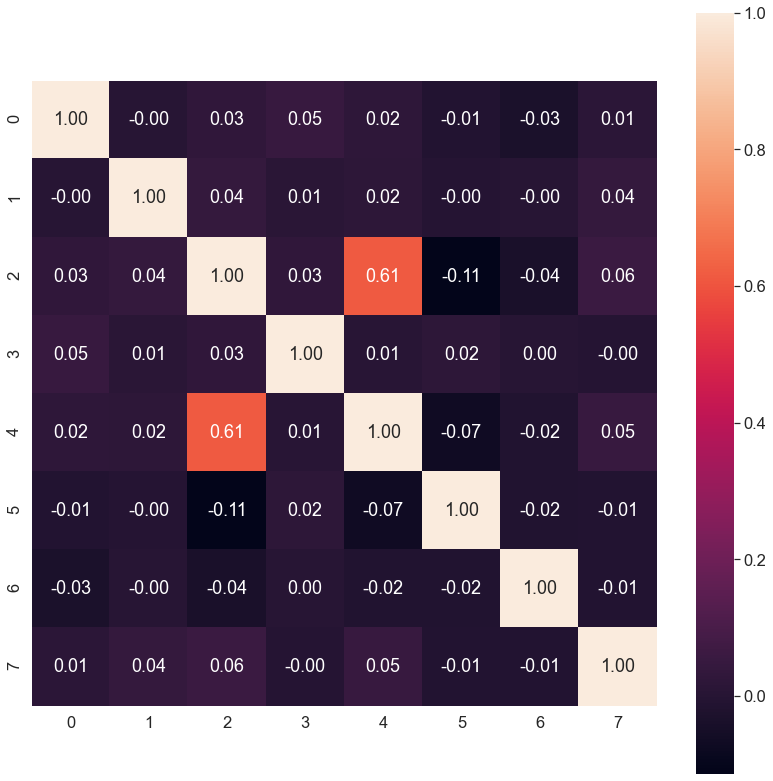

In [11]:
df_corr=df.drop(columns=['Area','Item'])
cm=np.corrcoef(df_corr.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(14,14))
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f')
plt.show()

In [12]:
df.head()

,Area Code,Area,Item Code,Item,Year,Price(LCU/tonne),Temp Difference,GDP_Growth_US$,GDP_Growth,Yield
0,2,Afghanistan,221,"Almonds, with shell",1993,46000.0,0.666625,-23.317792,-23.317792,16364.0
1,2,Afghanistan,515,Apples,1993,6100.0,0.666625,-23.317792,-23.317792,73913.0
2,2,Afghanistan,526,Apricots,1993,29000.0,0.666625,-23.317792,-23.317792,72549.0
3,2,Afghanistan,44,Barley,1993,6300.0,0.666625,-23.317792,-23.317792,10000.0
4,2,Afghanistan,560,Grapes,1993,24000.0,0.666625,-23.317792,-23.317792,67956.0


In [13]:
df.Item.unique()

array(['Almonds, with shell', 'Apples', 'Apricots', 'Barley', 'Grapes',
       'Maize', 'Melons, other (inc.cantaloupes)', 'Oranges',
       'Pistachios', 'Potatoes', 'Rice, paddy', 'Walnuts, with shell',
       'Wheat', 'Watermelons', 'Beans, dry', 'Plums and sloes',
       'Tomatoes', 'Vegetables, fresh nes', 'Cherries', 'Figs',
       'Fruit, fresh nes', 'Oats', 'Olives', 'Pears',
       'Tobacco, unmanufactured', 'Soybeans', 'Sunflower seed',
       'Cabbages and other brassicas', 'Carrots and turnips',
       'Cucumbers and gherkins', 'Garlic',
       'Leeks, other alliaceous vegetables', 'Lemons and limes',
       'Onions, dry', 'Peaches and nectarines', 'Spinach',
       'Tangerines, mandarins, clementines, satsumas',
       'Cauliflowers and broccoli', 'Chestnut',
       'Chillies and peppers, green', 'Eggplants (aubergines)',
       'Lettuce and chicory', 'Onions, shallots, green',
       'Pumpkins, squash and gourds', 'Rye', 'Quinces', 'Dates',
       'Beans, green', 'Nuts, n

In [14]:
print(df['Area'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China, Hong Kong SAR'
 'China, mainland' 'Colombia' 'Comoros' 'Congo' 'Cook Islands'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran (Islamic Republic of)' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyzstan'
 "Lao People's Democratic Republic" 'Latvia' '

In [15]:
x=input("Enter the item: ")
y=input("Enter the country: ")
#df_train=df.loc[(df['Item']==x) & (df['Area'==y])]
df_train = df.loc[(df['Item'] == x) & (df['Area']==y)]
df_train.drop(columns = [ 'Item Code','Item','Area','Area Code'], inplace = True)
df_train

Enter the item: Rice, paddy
Enter the country: India


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Price(LCU/tonne),Temp Difference,GDP_Growth_US$,GDP_Growth,Yield
33933,2001,5877.3,0.347187,3.245053,8.402089,31158.0
33973,1991,3648.0,0.156375,-11.356972,15.174573,26271.0
33998,1992,3962.0,0.059000,0.425648,14.448629,26092.0
34021,1993,4311.0,0.292250,-2.381812,14.850308,28303.0
34044,1994,4410.0,0.098500,14.563014,17.870860,28645.0
34067,1995,4890.0,0.210125,13.492857,17.303238,26972.0
34089,1996,5474.0,0.245312,5.397194,15.167860,28226.0
34111,1997,4336.0,-0.132875,8.583312,11.280375,28457.0
34133,1998,4940.0,0.584062,0.639236,14.346881,28805.0
34157,1999,6224.0,0.391750,6.608375,11.249149,29782.0


In [16]:
X = df_train.loc[:, ['Year', 'Temp Difference']]
y = df_train.loc[:, 'Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
Yield_reg = LinearRegression()
Yield_reg.fit(X_train, y_train)
y_pred_t = Yield_reg.predict(X_train)
linear_train = r2_score(y_train, y_pred_t)
print('Training: ',linear_train)
y_pred=Yield_reg.predict(X_test)
linear_test = r2_score(y_test, y_pred)
print('Test: ',r2_score(y_test, y_pred))

Training:  0.9224410644690707
Test:  0.9385490067254758


Training: [0.9224410644690707, 0.9340355743146243, 0.9738434998827449, 0.9739002617921747, 0.9738820131415281, 0.9738639492644185, 0.9738460752034223, 0.9738283959853897, 0.973810916593066]
Test: [0.9385490067254758, 0.8901248036078693, 0.8468557892918258, 0.8521197334609227, 0.8518222086486963, 0.8515200220068047, 0.8512130177255177, 0.850900531890168, 0.8505825710922926]


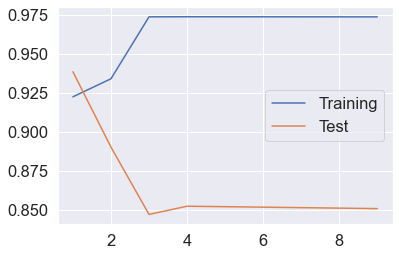

In [18]:
avg = []
avg_t = []
num = []
for i in range(1,10):
    num.append(i)
    r_net=0
    r_net_t=0
    lm = LinearRegression()
    poly_reg = PolynomialFeatures(degree=i)
    poly_X = poly_reg.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.3,random_state=42)
    lm.fit(X_train, y_train)
    y_pred_t=lm.predict(X_train)
    r_net_t=r2_score(y_train, y_pred_t)
    avg_t.append(r_net_t)
    y_pred=lm.predict(X_test)
    r_net=r2_score(y_test, y_pred)
    avg.append(r_net)
print('Training:',avg_t )    
print('Test:',avg)
plt.plot(num, avg_t, label='Training')
plt.plot(num,avg,label='Test')
plt.legend()
a=max(avg)
index=avg.index(a)
poly_train = avg_t[index]
poly_test = a

In [19]:
X=df_train.drop(columns = ['Price(LCU/tonne)'], axis = 1)
y=df_train['Price(LCU/tonne)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_t = lin_reg.predict(X_train)
linear_train = r2_score(y_train, y_pred_t)
print('Training: ',linear_train)
y_pred=lin_reg.predict(X_test)
linear_test = r2_score(y_test, y_pred)
print('Test: ',r2_score(y_test, y_pred))

Training:  0.877850874314858
Test:  0.5584713801835355


Training: [0.9960448963949482, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Test: [0.7528662663914835, 0.7922339503433565, 0.8808857606234116, 0.8959863274108275, 0.918850570519959, 0.920095892443589, 0.8732851242902795, 0.7292916064202482]


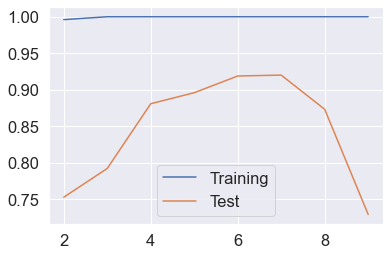

In [21]:
avg=[]
avg_t=[]
num=[]
for i in range(2,10):
    num.append(i)
    r_net=0
    r_net_t=0
    lm = LinearRegression()
    poly_reg=PolynomialFeatures(degree=i)
    poly_X=poly_reg.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.3,random_state=42)
    lm.fit(X_train, y_train)
    y_pred_t=lm.predict(X_train)
    r_net_t=r2_score(y_train, y_pred_t)
    avg_t.append(r_net_t)
    y_pred=lm.predict(X_test)
    r_net=r2_score(y_test, y_pred)
    avg.append(r_net)
print('Training:',avg_t )    
print('Test:',avg)
plt.plot(num, avg_t, label='Training')
plt.plot(num,avg,label='Test')
plt.legend()
a=max(avg)
index=avg.index(a)
poly_train = avg_t[index]
poly_test = a

In [22]:
total=0
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-4114294.154883247


In [23]:
ridge = Ridge(alpha=10)
ridge.fit(X_train, y_train)
y_pred_t=ridge.predict(X_train)
ridge_train=r2_score(y_train, y_pred_t)

print('Train: ',ridge_train)
y_pred=ridge.predict(X_test)
ridge_test=r2_score(y_test, y_pred)
print('Test: ',ridge_test)

Train:  0.9653253338301406
Test:  0.8503566736305052


c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


In [24]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,10,20]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41609178.51530264, tolerance: 41087.980926137934
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40174359.014073744, tolerance: 25630.36774055173
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12774289.354489274, tolerance: 20677.925003999997
  positive)
c:\users\bbcc\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_coordinate_descent.py

{'alpha': 20}
-4342999.454668986


In [25]:
lasso = Lasso(alpha = 20, max_iter = 1000000)
lasso.fit(X_train, y_train)
y_pred_t=lasso.predict(X_train)
lasso_train=r2_score(y_train, y_pred_t)
print('Train: ',lasso_train)
y_pred=lasso.predict(X_test)
lasso_test=r2_score(y_test, y_pred)
print('Test: ',lasso_test)

Train:  0.9999999999795486
Test:  0.45868029766126805


In [26]:
train_error=[linear_train,poly_train,ridge_train,lasso_train]
test_error=[linear_test,poly_test,ridge_test,lasso_test]

col={'Train score(r2)':train_error,'Test score(r2)':test_error}
models=['Linear Regression','Polynomial','Ridge Regression','Lasso Regression']
df=pd.DataFrame(data=col,index=models)
df

,Train score(r2),Test score(r2)
Linear Regression,0.877851,0.558471
Polynomial,1.000000,0.920096
Ridge Regression,0.965325,0.850357
Lasso Regression,1.000000,0.458680


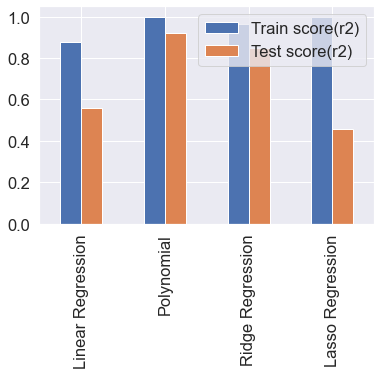

In [27]:
df.plot(kind='bar')

In [28]:
model_index = test_error.index(max(test_error))
print(model_index)

1


In [29]:
if (model_index == 0):
    lin_reg.predict()
elif (model_index == 1):
    lm = LinearRegression()
    poly_reg = PolynomialFeatures(degree = index + 2)
    poly_X = poly_reg.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.3,random_state=42)
    lm.fit(X_train, y_train)
    p = pd.DataFrame([ ])
    p[0][6] = Yield_reg.predict(p.loc())
    p = poly_red.fit_transform(p)
    lm.predict(p)